In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('../Dataset/diamonds_clean.csv')
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print("No. of Duplicate Rows: ", df.duplicated().sum())
df = df.drop_duplicates()
print("No. of Duplicate Rows after removing: ", df.duplicated().sum())

No. of Duplicate Rows:  126
No. of Duplicate Rows after removing:  0


In [4]:
df = df.loc[~(((df['x'] <= 0) | (df['y'] <= 0)) | (df['z'] <= 0))]

In [5]:
neighbours = np.arange(1,6)
train_accuracy = np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))




In [6]:
test_sizes = [0.1, 0.15, 0.2, 0.3]
random_states = [0, 1, 42, 43, 100, 313]
best_accuracy = 0
best_test_size = 0
best_random_state = 0

for test_size in test_sizes:
        for random_state in random_states:
            X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=test_size, random_state=random_state)
            knn = KNeighborsRegressor(n_neighbors=8)
            knn.fit(X_train, y_train)
            y_pred = knn.predict(X_test)
            accuracy = r2_score(y_test, y_pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_test_size = test_size
                best_random_state = random_state
            print( "Test Size: ", test_size, "Random State: ", random_state, "Accuracy: ", accuracy)
            print("Best Accuracy: ", best_accuracy, "Best Test Size: ", best_test_size, "Best Random State: ", best_random_state )

print("Best Accuracy: ", best_accuracy)
print("Best Test Size: ", best_test_size)
print("Best Random State: ", best_random_state)





Test Size:  0.1 Random State:  0 Accuracy:  0.9564130778085705
Best Accuracy:  0.9564130778085705 Best Test Size:  0.1 Best Random State:  0
Test Size:  0.1 Random State:  1 Accuracy:  0.954231866386452
Best Accuracy:  0.9564130778085705 Best Test Size:  0.1 Best Random State:  0
Test Size:  0.1 Random State:  42 Accuracy:  0.9571502549979354
Best Accuracy:  0.9571502549979354 Best Test Size:  0.1 Best Random State:  42
Test Size:  0.1 Random State:  43 Accuracy:  0.9529627095963958
Best Accuracy:  0.9571502549979354 Best Test Size:  0.1 Best Random State:  42
Test Size:  0.1 Random State:  100 Accuracy:  0.9553220483174873
Best Accuracy:  0.9571502549979354 Best Test Size:  0.1 Best Random State:  42
Test Size:  0.1 Random State:  313 Accuracy:  0.9587041214758786
Best Accuracy:  0.9587041214758786 Best Test Size:  0.1 Best Random State:  313
Test Size:  0.15 Random State:  0 Accuracy:  0.9549765911131107
Best Accuracy:  0.9587041214758786 Best Test Size:  0.1 Best Random State:  313


In [7]:
knn_Model = KNeighborsRegressor(n_neighbors=8)
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.1, random_state=313)
knn_Model.fit(X_train, y_train)
y_pred = knn_Model.predict(X_test)
print("Accuracy: ", r2_score(y_test, y_pred))


Accuracy:  0.9587041214758786


In [8]:
## save the model
import pickle
with open('KNN_model.pkl', 'wb') as file:
    pickle.dump(knn, file)


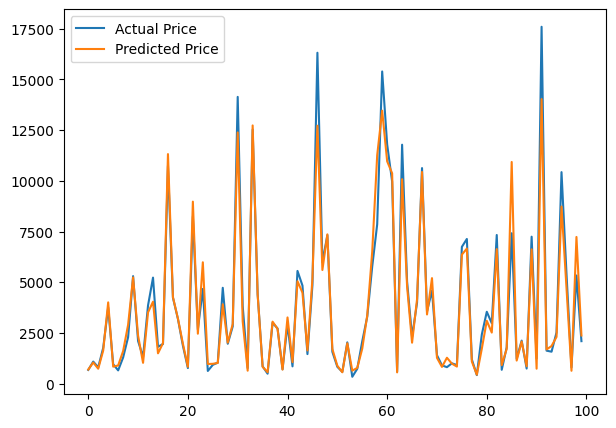

In [9]:
df1 = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
df1 = df1.sample(100)
df1= df1.reset_index(drop=True)
df1.plot(kind='line', figsize=(7, 5))
plt.show()


In [10]:
knn_Model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 8,
 'p': 2,
 'weights': 'uniform'}